## Analyzing the Effects of COVID-19 on the U.S. Population

Didier Copay and Evan Zheng

As you know, COVID-19 is an illness caused by a virus that has been characterized as a global epidemic by the World Health Organization (WHO). In the short time it has been around, COVID-19 has taken plenty of lives and affected many more across the globe. However, we're going to take a closer look at the U.S. and use COVID-19 statistics to make a prediction about the growth of the U.S. population. The World Health Organization (Their site can be found [here](https://www.who.int/)) provides us with the specific numbers of COVID-19 related cases and deaths worldwide. Their data shows us the number of new cases and deaths in every country every day since COVID-19 cases were being reported. Using this data and U.S. population statistics we can see how the U.S. population has been affected by COVID-19 and predict how it will continue affecting our population in the future.

## Data Scraping 1

The first step is to import these helpful built-in python libraries. These libraries contain functions that have already been written, so we're just getting access to them to make calculations and other such things easier.

In [16]:
import numpy as np
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

To start, we're going to look through a [stock site](https://www.multpl.com/us-population-growth-rate/table/by-month) that has data on the monthly growth rate of the U.S. population from July, 1901 to December, 2021. We have to create a pandas data frame with the same dimensions as the table on the site and then use the libraries we imported to read in the data from the site into our data frame.

In [17]:
# data 1

try:
  headers = {
    'User-Agent': 'Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405',
    'From': 'aw183052@terpmail.umd.edu'
  }

  r1 = requests.get("https://www.multpl.com/us-population-growth-rate/table/by-month", headers=headers)

except error as e:
  print(e)

root1 = BeautifulSoup(r1.content, "html")

#find and getting the data table for our first website
webTable1 = root1.find('table', attrs = {"id": "datatable"} ).prettify()

#creating a table for webtable1
columns = ['Date',  'Growth Rate']
index = range(1, 1447)

#takes the first dataframe from the list
dataTable1 = pd.read_html(webTable1)[0] #list of dataFrame

#set columns name to values in columns and set the index with range from 1 - 1447
dataTable1.columns = columns
dataTable1.index = index 

dataTable1

,Date,Growth Rate
1,"Dec 1, 2021",0.00%
2,"Nov 1, 2021",0.04%
3,"Oct 1, 2021",0.08%
4,"Sep 1, 2021",0.13%
5,"Aug 1, 2021",0.18%
...,...,...
1442,"Nov 1, 1901",1.96%
1443,"Oct 1, 1901",1.96%
1444,"Sep 1, 1901",1.96%
1445,"Aug 1, 1901",1.96%


Now that we have successfully scraped our data, we need to tidy our data. As you can see, we have over a thousand rows dating back to the 18th century. The problem is that we only care about data when COVID-19 came into effect so we won't be using most of the data that we scraped. To make things easier to read and work with we need to find the index of the row of December 2019 and drop all the rows after that index. For our convenience we will also change the data in the Growth Rate column to floats and then we will reverse the data so that it starts with the past and comes to the present so it's easier to make and read our graphs.

## Tidying Data 1

In [18]:
# data 1
# tidying datatable1

# getting the index where the data is Dec 1, 2019
# so we can use the index later on to get dates starting from Jan 1, 2020
for index, row in dataTable1.iterrows():
    if dataTable1.at[index, 'Date'] == 'Dec 1, 2019':
        i = index
        break

# drop all the rows that is before index i (Dec 1, 2019)
while i <= 1446:
    dataTable1 = dataTable1.drop([i])
    i += 1

# change the strings in Growth Rate column so it will be just numbers
percent = []
for index, row in dataTable1.iterrows():
    percent.append(float(row['Growth Rate'].split('%')[0]))

# change the Growth Rate column to new data
dataTable1['Growth Rate'] = percent

# then rename the column to Growth Rate (Percent)
dataTable1 = dataTable1.rename(columns = {'Growth Rate': 'Growth Rate (Percent)'})

# reverse the data table so 
dataTable1 = dataTable1.iloc[::-1]

dataTable1

,Date,Growth Rate (Percent)
24,"Jan 1, 2020",0.49
23,"Feb 1, 2020",0.49
22,"Mar 1, 2020",0.49
21,"Apr 1, 2020",0.49
20,"May 1, 2020",0.50
19,"Jun 1, 2020",0.50
18,"Jul 1, 2020",0.50
17,"Aug 1, 2020",0.50
16,"Sep 1, 2020",0.50
15,"Oct 1, 2020",0.50


Now our data is much smaller and relevant to our topic. To properly understand our growth rate we're going to graph the growth rate over time using one of the libraries we imported before.

## Graphing Data 1

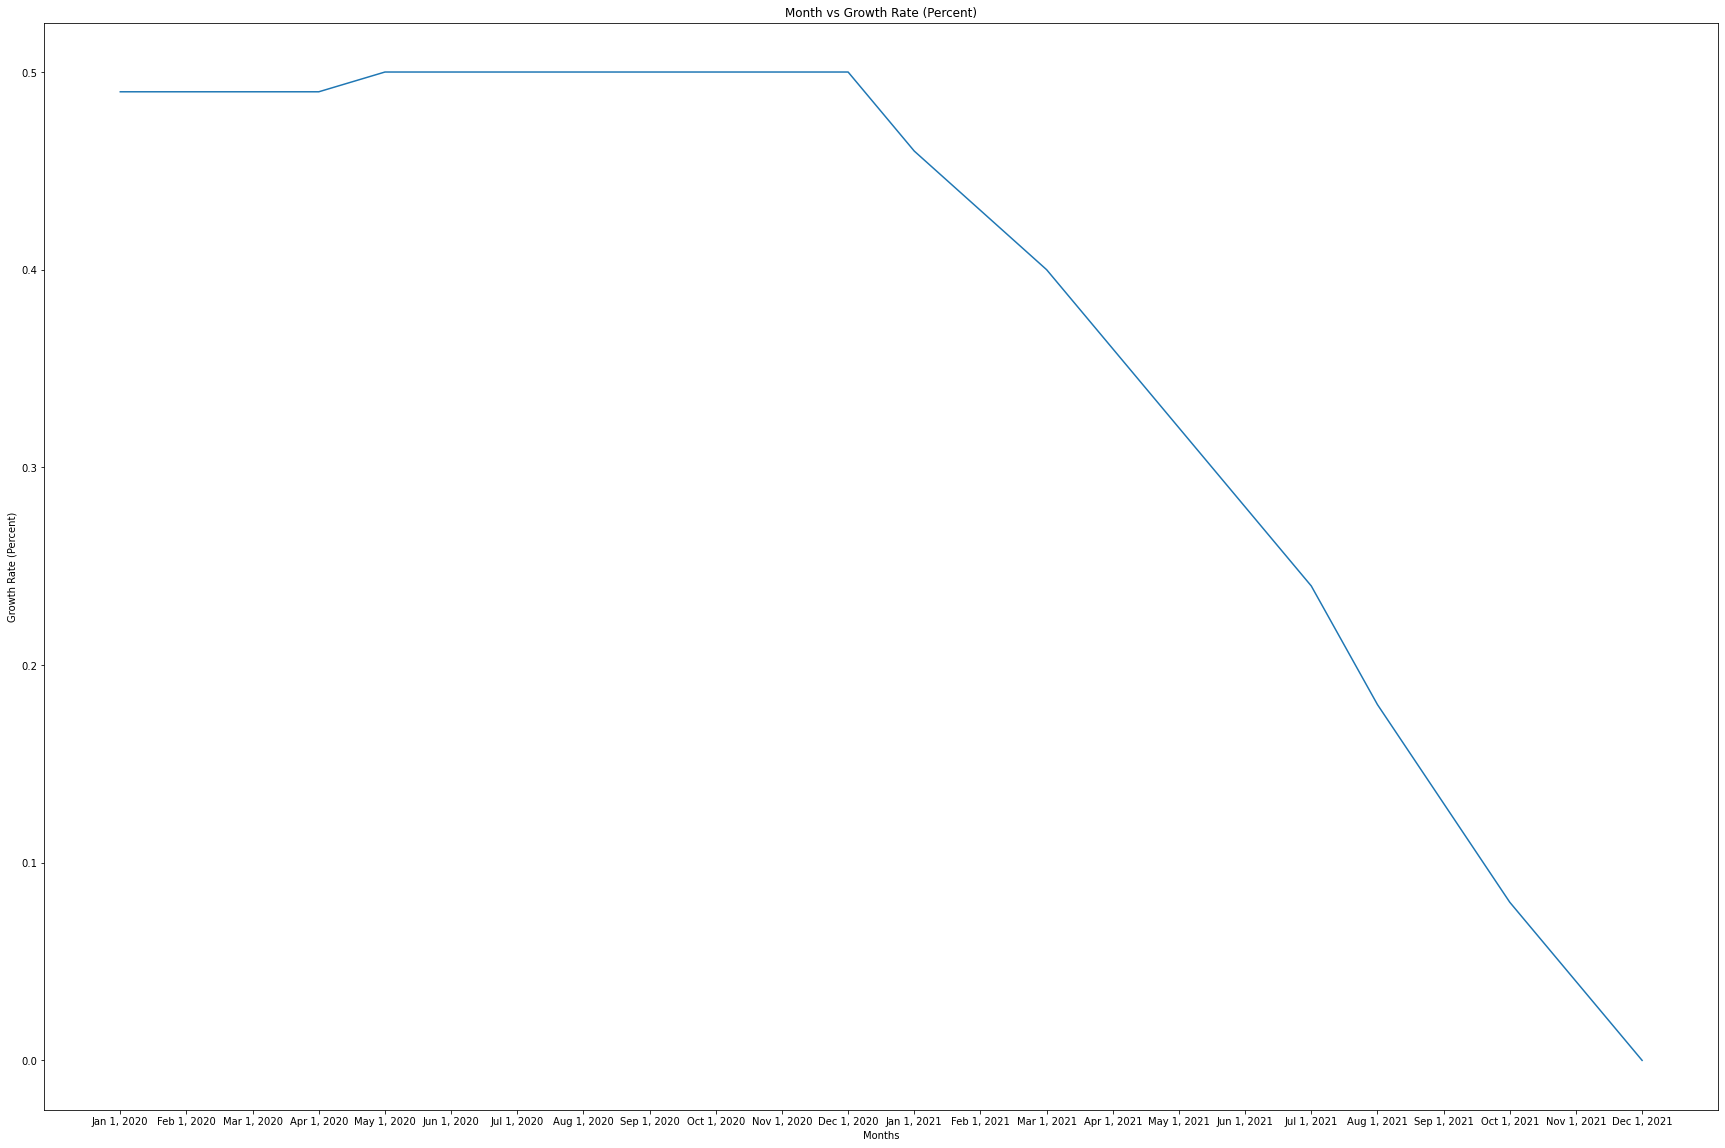

In [19]:
# data 1 graphing

# Set the size of the plots
plt.figure(figsize = (30, 20))

# Plot the two columns
plt.plot(dataTable1['Date'], dataTable1['Growth Rate (Percent)'])

# label the title, x-axis, and y-axis
plt.xlabel('Months')
plt.ylabel('Growth Rate (Percent)')
plt.title('Month vs ' + 'Growth Rate (Percent)')

plt.show()

Our graph shows us that the growth rate of the U.S. population was going steady but began dropping once COVID-19 reached us.

## Scraping Data 2

Now we need to get our COVID-19 data from the World Health Organization. This data will give us the number of reported new cases and deaths every day in every country across the world. They also provide us with the cumulative cases and deaths at each day for each country. However, we're only interested in data for the United States of America, so we'll have to look for that in the data and only add that data to our data frame. The World Health Organization is huge, with over 160,000 rows, so if we were to tackle this problem head on it would take a while for our code to finish running. We need to use a strategy of breaking the data into chunks and processing each chunk at a time. We'll drop any data that isn't from the U.S. from the chunks and then put them all together at the end. After that, we need to adjust our indices and drop the columns we don't need.

In [20]:
# data 2

# Getting Data from WHO
dataFrameChunk = pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv', chunksize = 1000)

# append each chunk df here 
chunkList = []

# Each chunk is in dataframe format
index = 0
for chunk in dataFrameChunk:

    # look through row in chunk and drop row of data that is not America
    for i in chunk.index:
        if index == 1000:
            index = 0
        if chunk["Country"][i] != 'United States of America':
            chunk = chunk.drop([i])
        else:
            index = index + 1

    # Once the data filtering is done, append the chunk to list
    chunkList.append(chunk)

# concat all the chunks in list into one dataframe 
dataFrameConcat = pd.concat(chunkList)

# getting the number of rows of data in dataFrameConcat
numIndex = len(dataFrameConcat.index)
x = [*range(1,numIndex + 1)]

# change the index to 1 - maxIndex
# the data will update everyday so the maxIndex will be different
dataFrameConcat['index'] = x
dataFrameConcat = dataFrameConcat.set_index('index')

# drop the unused columns
dataFrameConcat = dataFrameConcat.drop(['Country_code', 'WHO_region', 'New_cases', 'Country'], axis = 1)

# change the name of the columns
dataFrameConcat = dataFrameConcat.rename(columns = {'Date_reported': 'Date', 'Cumulative_cases': 'Cumulative Cases', 'New_deaths': 'New Deaths', 'Cumulative_deaths': 'Cumulative Deaths'})

dataFrameConcat

,Date,Cumulative Cases,New Deaths,Cumulative Deaths
index,,,,
1,2020-01-03,0,0,0
2,2020-01-04,0,0,0
3,2020-01-05,0,0,0
4,2020-01-06,0,0,0
5,2020-01-07,0,0,0
...,...,...,...,...
714,2021-12-16,49958053,1824,794370
715,2021-12-17,50102068,1835,796205
716,2021-12-18,50258767,1091,797296


Our data is now much smaller and only contains the data we care about.

## Tidying Data 2

We're still not done tidying this data though. We're going to change the dates to be monthly rather than daily so we can compare with the U.S. population data we got above. This means we also need to compile the cumulative cases, new cases, and cumulative deaths into months. We'll take the sums of each of the columns at the end of each month and we'll add it to a new data frame for the sake of convenience.

In [21]:
# data 2
# tidying COVID data

currMonth = "01"
currYear = "2020"
casesSum = 0
newDeathsSum = 0
deathsSum = 0
dataTable2 = pd.DataFrame(columns = ['Year-Month', 'Cumulative Cases', 'New Deaths', 'Cumulative Deaths'])
indexRange = 1

# combine all the data in each day of the month into one row of data
for index, row in dataFrameConcat.iterrows():

    # getting the year and month number
    year = row['Date'].split('-')[0]
    month = row['Date'].split('-')[1]

    # if the new row month is equal to the current month add the cases, new death, and total death together
    if month == currMonth:
        casesSum += dataFrameConcat.at[index, 'Cumulative Cases']
        newDeathsSum += dataFrameConcat.at[index, 'New Deaths']
        deathsSum += dataFrameConcat.at[index, 'Cumulative Deaths']

    # when finish adding one month's data, add to dataTable2, update month and year, and reset death sum
    else:
        row = pd.DataFrame(data = [[currYear + "-" + currMonth, casesSum, newDeathsSum, deathsSum]], columns = ['Year-Month', 'Cumulative Cases', 'New Deaths', 'Cumulative Deaths'], index = range(0, 1))
        dataTable2 = dataTable2.append(row)
        currMonth = month
        currYear = year
        newDeathsSum = 0
        indexRange += 1

# add the last row of data to dataTable2
row = pd.DataFrame(data = [[year + "-" + currMonth, casesSum, newDeathsSum, deathsSum]], columns = ['Year-Month', 'Cumulative Cases', 'New Deaths', 'Cumulative Deaths'], index = range(0, 1))
dataTable2 = dataTable2.append(row)

# change the range of the index 
dataTable2.index = range(1, indexRange + 1)

dataTable2

,Year-Month,Cumulative Cases,New Deaths,Cumulative Deaths
1,2020-01,22,0,0
2,2020-02,593,1,1
3,2020-03,992904,3336,15567
4,2020-04,19230046,56618,937009
5,2020-05,62855535,42373,3564231
6,2020-06,125599268,22007,6976654
7,2020-07,232689600,28342,11237252
8,2020-08,393456205,30465,16487011
9,2020-09,586335822,20634,22311297
10,2020-10,828742310,22648,28975964


Finally we've finished tidying the data into a format that we can understand through visualization as well as compare to the data we got before.

## Graphing Data 2

Here, we're going to use one of the libraries we imported to create bar graphs of the cumulative cases, new cases, and cumulative deaths of each month starting from January 2020 to December 2021.

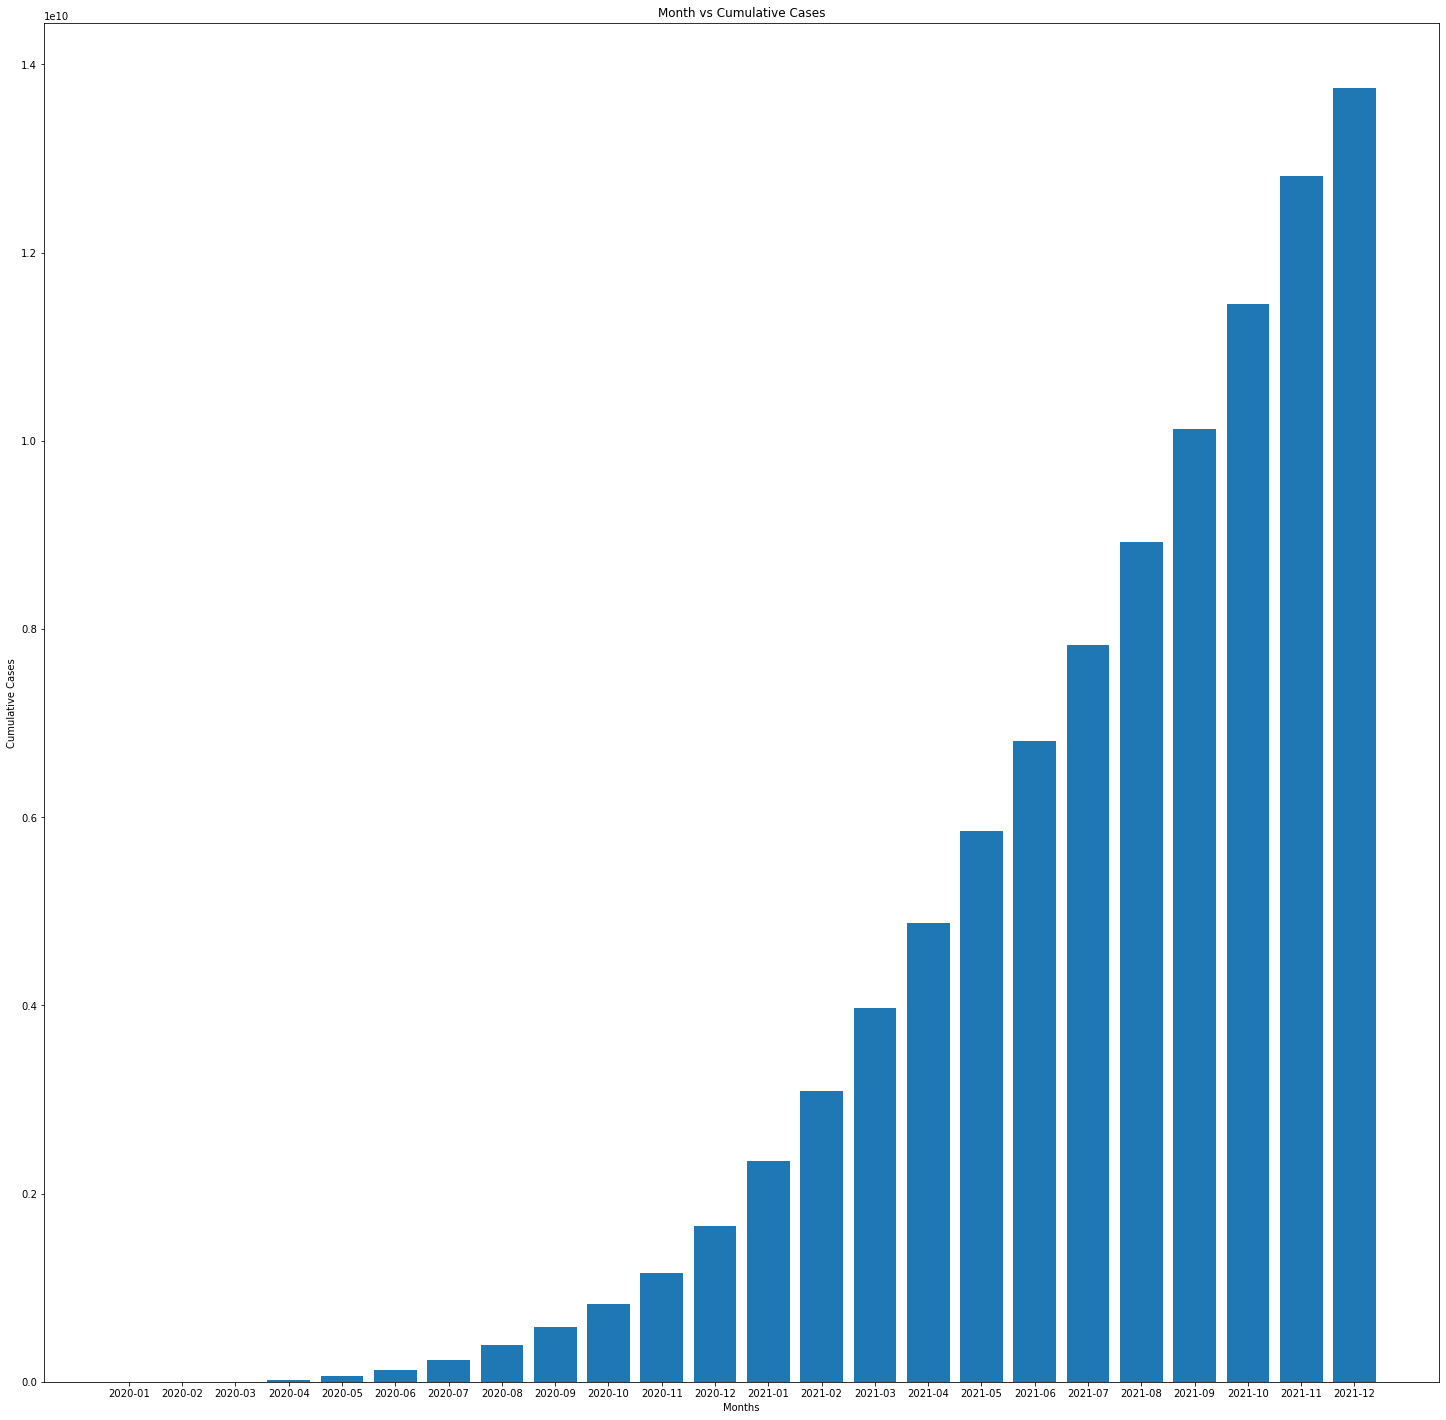

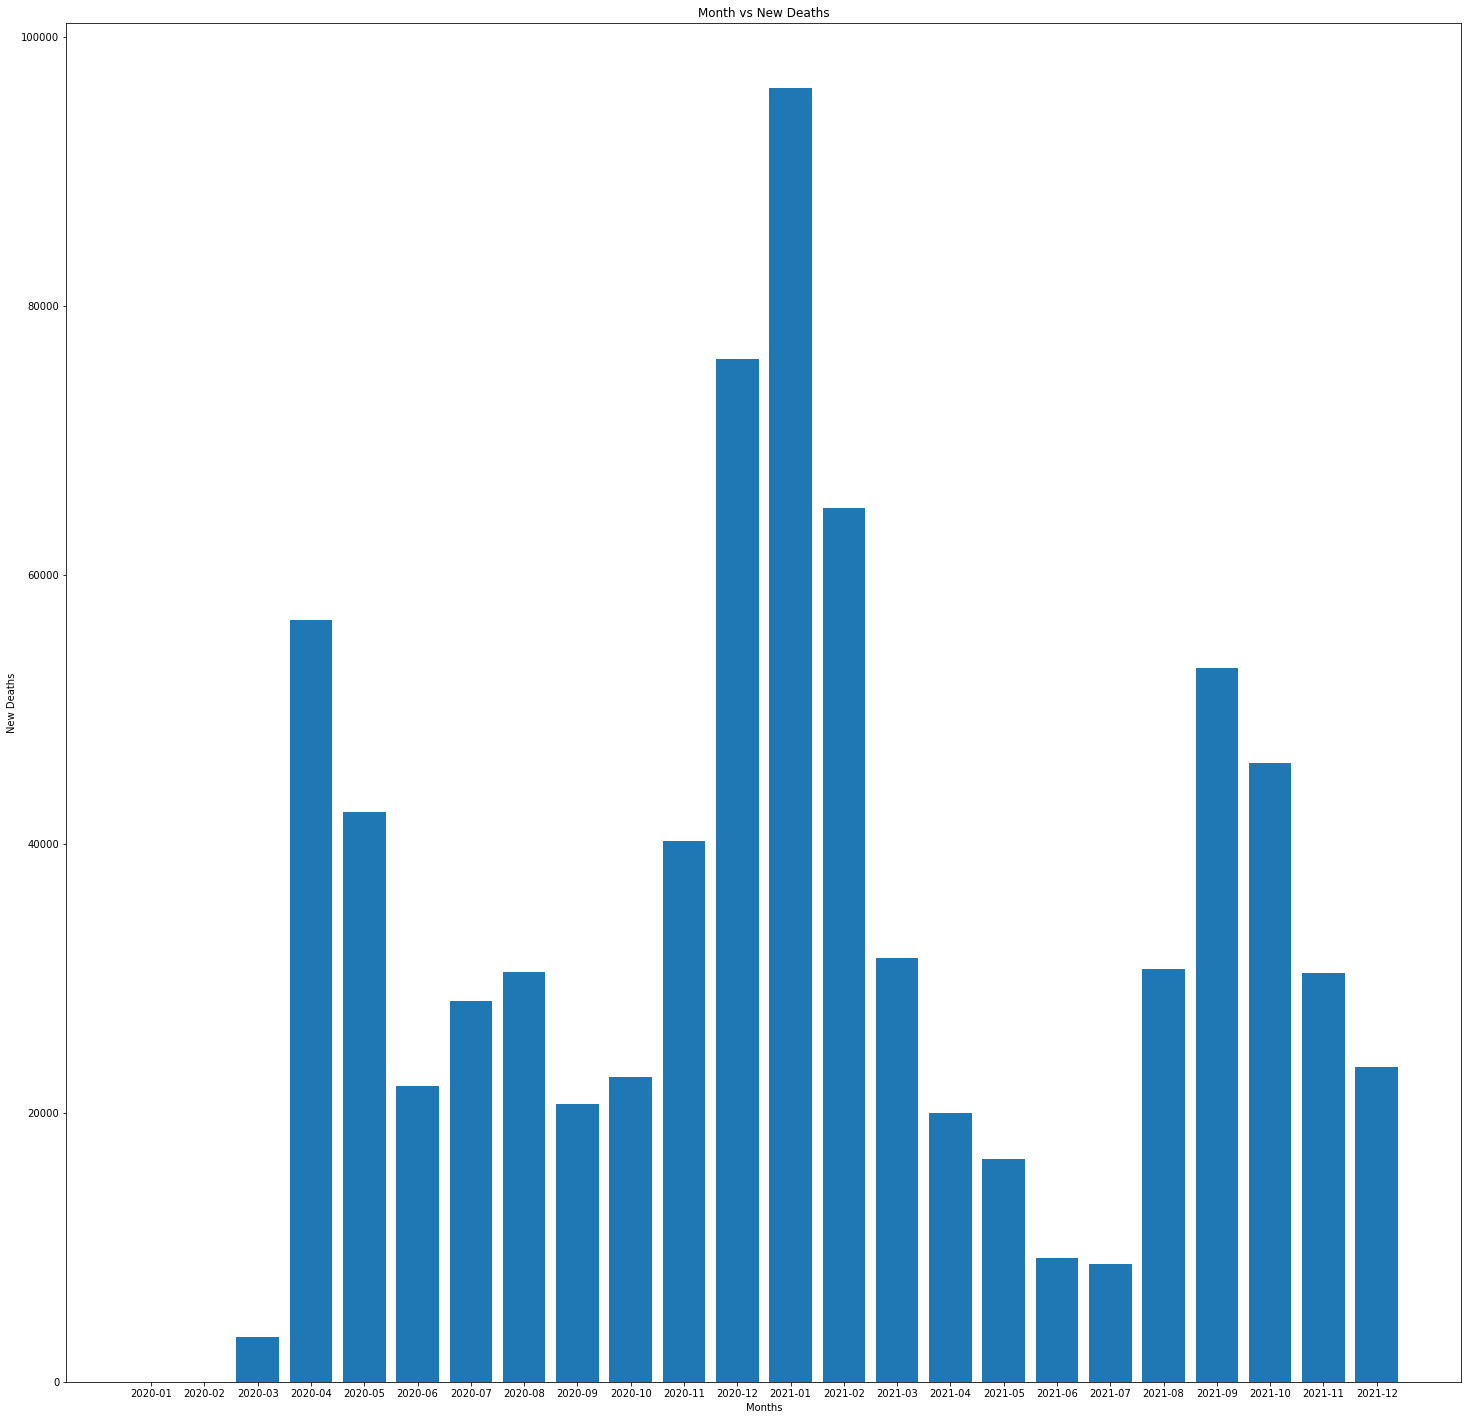

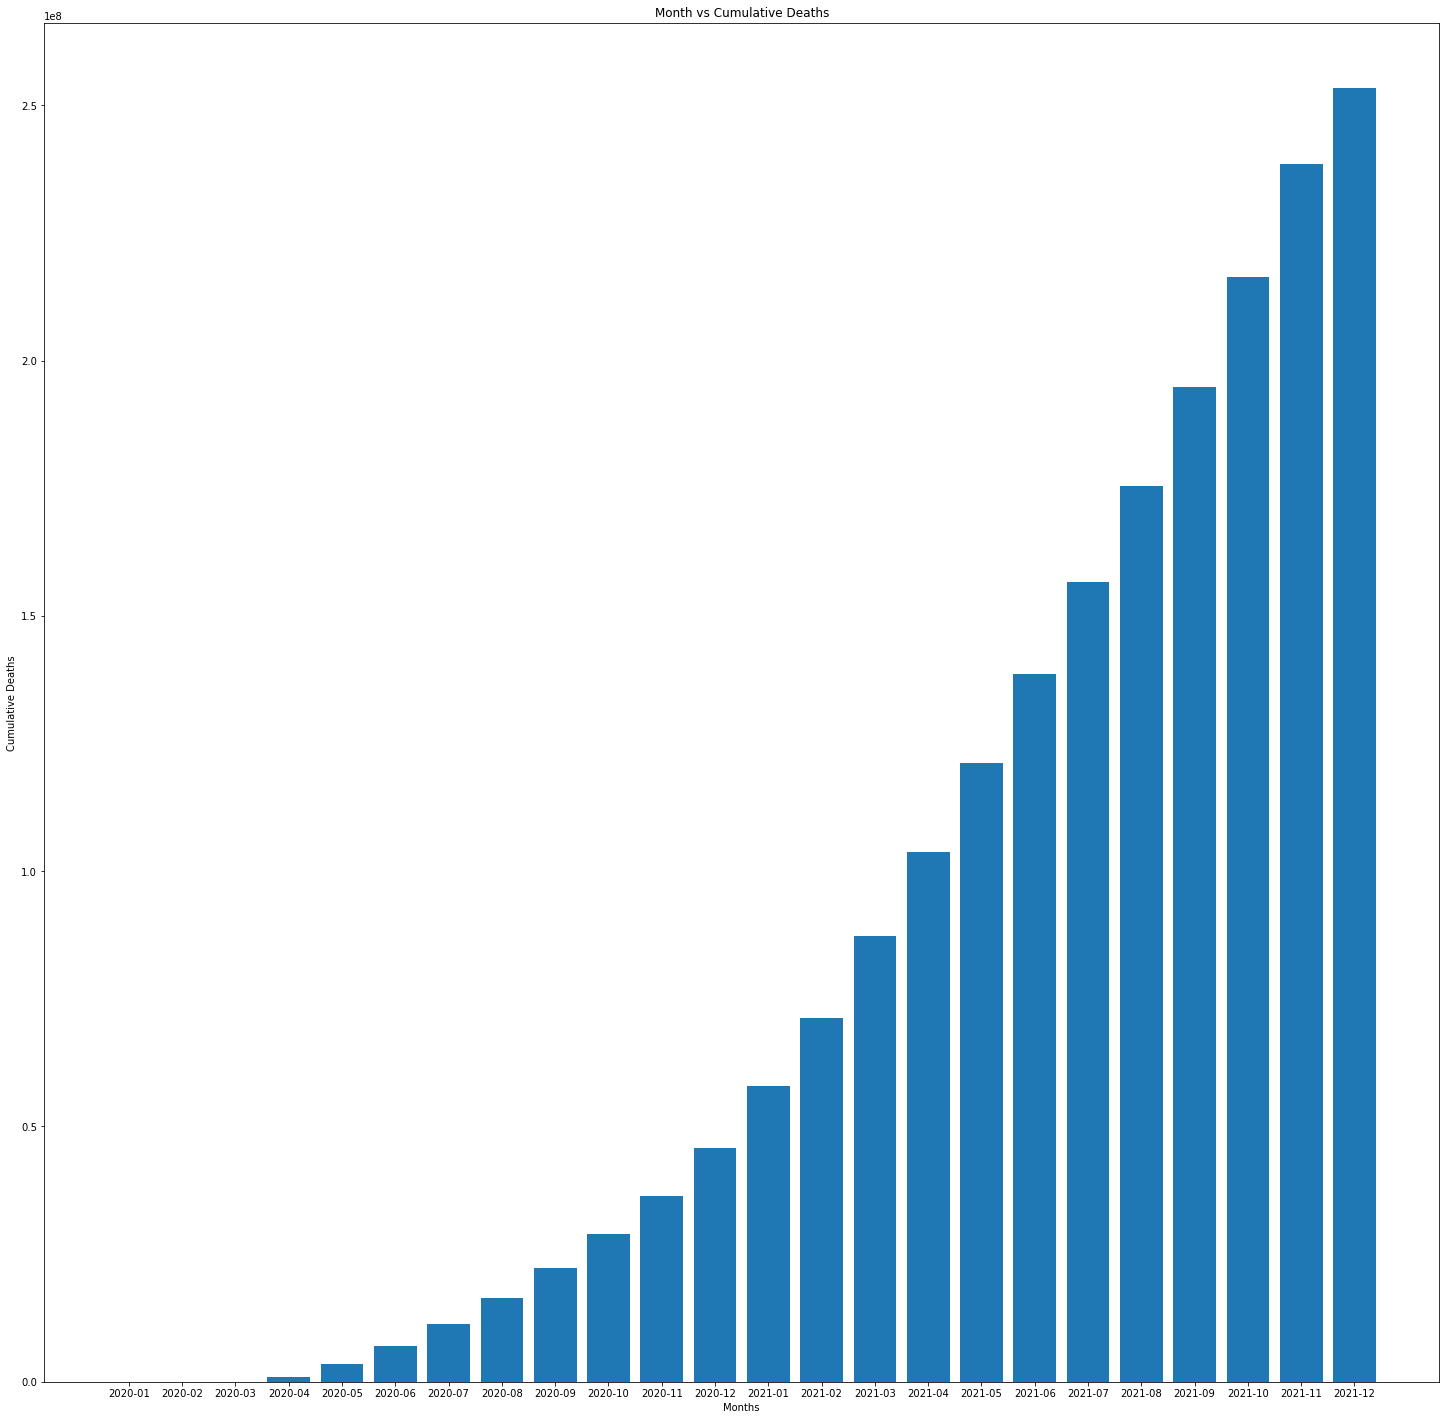

In [22]:
#data 2 graph

y = ["Cumulative Cases", "New Deaths", "Cumulative Deaths"]
columns = dataTable2.columns
c = 0

# loop 3 times to create 3 graphs for Cumulative Cases, New Deaths, Cumulative Deaths
for i in range(2,5):

    # Set the size of the plots
    plt.figure(figsize = (25, 25))

    # Initialize each plot's x, y axises and title
    plt.xlabel('Months')
    plt.ylabel(y[c])
    plt.title('Month vs ' + y[c])

    # plot using the bar graph
    plt.bar(dataTable2["Year-Month"], dataTable2[y[c]])

    plt.show()

    c += 1

The first graph shows a continued increase of the number of cases over time. The same goes for the cumulative deaths meaning that overall we have not done much in terms of slowing down COVID-19. The graph of new deaths over time shows three different peaks, meaning that for some periods of time we were able to successfully quarantine ourselves, but during the holiday season people started going out again. Overall, the time spent in quarantine didn't help as much as seen in the other two graphs. The increasing number of deaths will prove to affect the U.S. population.

## Scraping Data 3

The next data we are obtaining is from wikipedia. This data set shows us the rank of current and past pandemics. Looking at this data, we can get a different perspective on COVID-19 compared to other epidemics and pandemics.

In [23]:
# data 3

try:
  headers = {
    'User-Agent': 'Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405',
    'From': 'aw183052@terpmail.umd.edu'
  }

  r2 = requests.get("https://en.wikipedia.org/wiki/List_of_epidemics", headers=headers)

except error as e:
  print(e)

root2 = BeautifulSoup(r2.content, "html")

#find and getting the table data from wikipedia
webTable2 = root2.find('table').prettify()

#creating a table for webtable2
columns = ['Rank', 'Name','Disease', 'Death Toll', 'Global Population Lost', 'Regional Population lost', 'Date', 'Location']
index = range(1, 20)

#takes the first dataframe from the list
dataTable3 = pd.read_html(webTable2)[0] #list of dataFrame

#set columns name to values in columns and set the index with range from 1 - 20
dataTable3.columns = columns
dataTable3.index = index 

dataTable3

,Rank,Name,Disease,Death Toll,Global Population Lost,Regional Population lost,Date,Location
1,1,Black Death,Bubonic plague,75–200 million,17–54% [Note 1],30–60% of European population [4],1346–1353,"Europe, Asia, and North Africa"
2,2,Spanish flu,Influenza A/H1N1,17–100 million,1–5.4% [5] [6],–,1918–1920,Worldwide
3,3,Plague of Justinian,Bubonic plague,15–100 million,7–56% [Note 1],25–60% of European population [7],541–549,Europe and West Asia
4,4,HIV/AIDS global epidemic,HIV/AIDS,36.3 million (as of 2020),[Note 2],–,1981–present,Worldwide
5,5,Third plague pandemic,Bubonic plague,12–15 million,[Note 2],–,1855–1960,Worldwide
6,6,COVID-19 pandemic,COVID-19,5.3–21.3 million (as of 18 December 2021) [No...,0.07–0.27% [2],–,2019 [Note 4] –present,Worldwide
7,7,Cocoliztli epidemic of 1545–1548,Cocoliztli,5–15 million,1–3% [Note 1],27–80% of Mexican population [13],1545–1548,Mexico
8,8,Antonine Plague,Smallpox or measles,5–10 million,3–6% [3],25–33% of Roman population [14],165–180 (possibly up to 190),Roman Empire
9,9,1520 Mexico smallpox epidemic,Smallpox,5–8 million,1–2% [Note 1],23–37% of Mexican population [13],1519–1520,Mexico
10,10,1918–1922 Russia typhus epidemic,Typhus,2–3 million,0.1–0.16% [6] [Note 5],1–1.6% of Russian population [15],1918–1922,Russia


Looking at this data, we can see that compared to other pandemics, COVID-19 has surpassed many previous plague and pandemics. This data also shows many interesting facts about all pandemics, like: global population lost, regional population lost, date, and location. As we can see that COVID-19 is already at number 6 of the list, it is far from surpassing the top 5 pandemics. But as we look deeper in this topic, we shall see if COVID-19 will increase its rank in the future. But for now, lets tidy the data.

## Tidying Data 3

In [24]:
# data 3 tidying

lowEnd = []
highEnd = []

# loop through each row of dataTable3
for i, row in dataTable3.iterrows():

    # if i is greater than 6, drop the rows because these diseases are lower than COVID
    if i <= 6:

        # for HIV/AIDS and COVID, the low and high are the same so we split the string differently
        # so we check if there's a "-" in the string
        if '–' not in row['Death Toll']:
            num = row['Death Toll'].split(' ')[0]
            lowEnd.append(float(num))
            highEnd.append(float(num))

        # other diseases, we split "Death Toll" into 2 parts so we can get low and high number respectively
        # we then add the numbers to their list
        else: 
            low = row['Death Toll'].split('–')[0] 
            high = row['Death Toll'].split('–')[1].split(' ')[0] 
            lowEnd.append(float(low))
            highEnd.append(float(high))
    else:
        dataTable3 = dataTable3.drop([i])

# add two new columns to dataTable3
dataTable3['Low End Death Toll'] = lowEnd
dataTable3['High End Death Toll'] = highEnd

# drop the unused columns
dataTable3 = dataTable3.drop(['Death Toll', 'Global Population Lost', 'Regional Population lost', 'Date'], axis=1)

dataTable3

,Rank,Name,Disease,Location,Low End Death Toll,High End Death Toll
1,1,Black Death,Bubonic plague,"Europe, Asia, and North Africa",75.0,200.0
2,2,Spanish flu,Influenza A/H1N1,Worldwide,17.0,100.0
3,3,Plague of Justinian,Bubonic plague,Europe and West Asia,15.0,100.0
4,4,HIV/AIDS global epidemic,HIV/AIDS,Worldwide,36.3,36.3
5,5,Third plague pandemic,Bubonic plague,Worldwide,12.0,15.0
6,6,COVID-19 pandemic,COVID-19,Worldwide,5.3,21.3


During tidying, we removed the columns that we won’t use (Death toll, GLobal Population Lost, Regional Population Lost, Date) and we created two new columns called low end death toll and high end death toll. The main idea is to get the numbers and store it in their respective list. First, we get the two numbers from the death toll column. It was originally presented as one column (10-20 million) so we split the string by the character “-“ and obtained the two numbers. For the pandemics that only have one number, we split it by a space character and use that one number for other low and high end data. 

Next we will represent each pandemic's low and high end death toll as bar graphs.

## Graphing Data 3

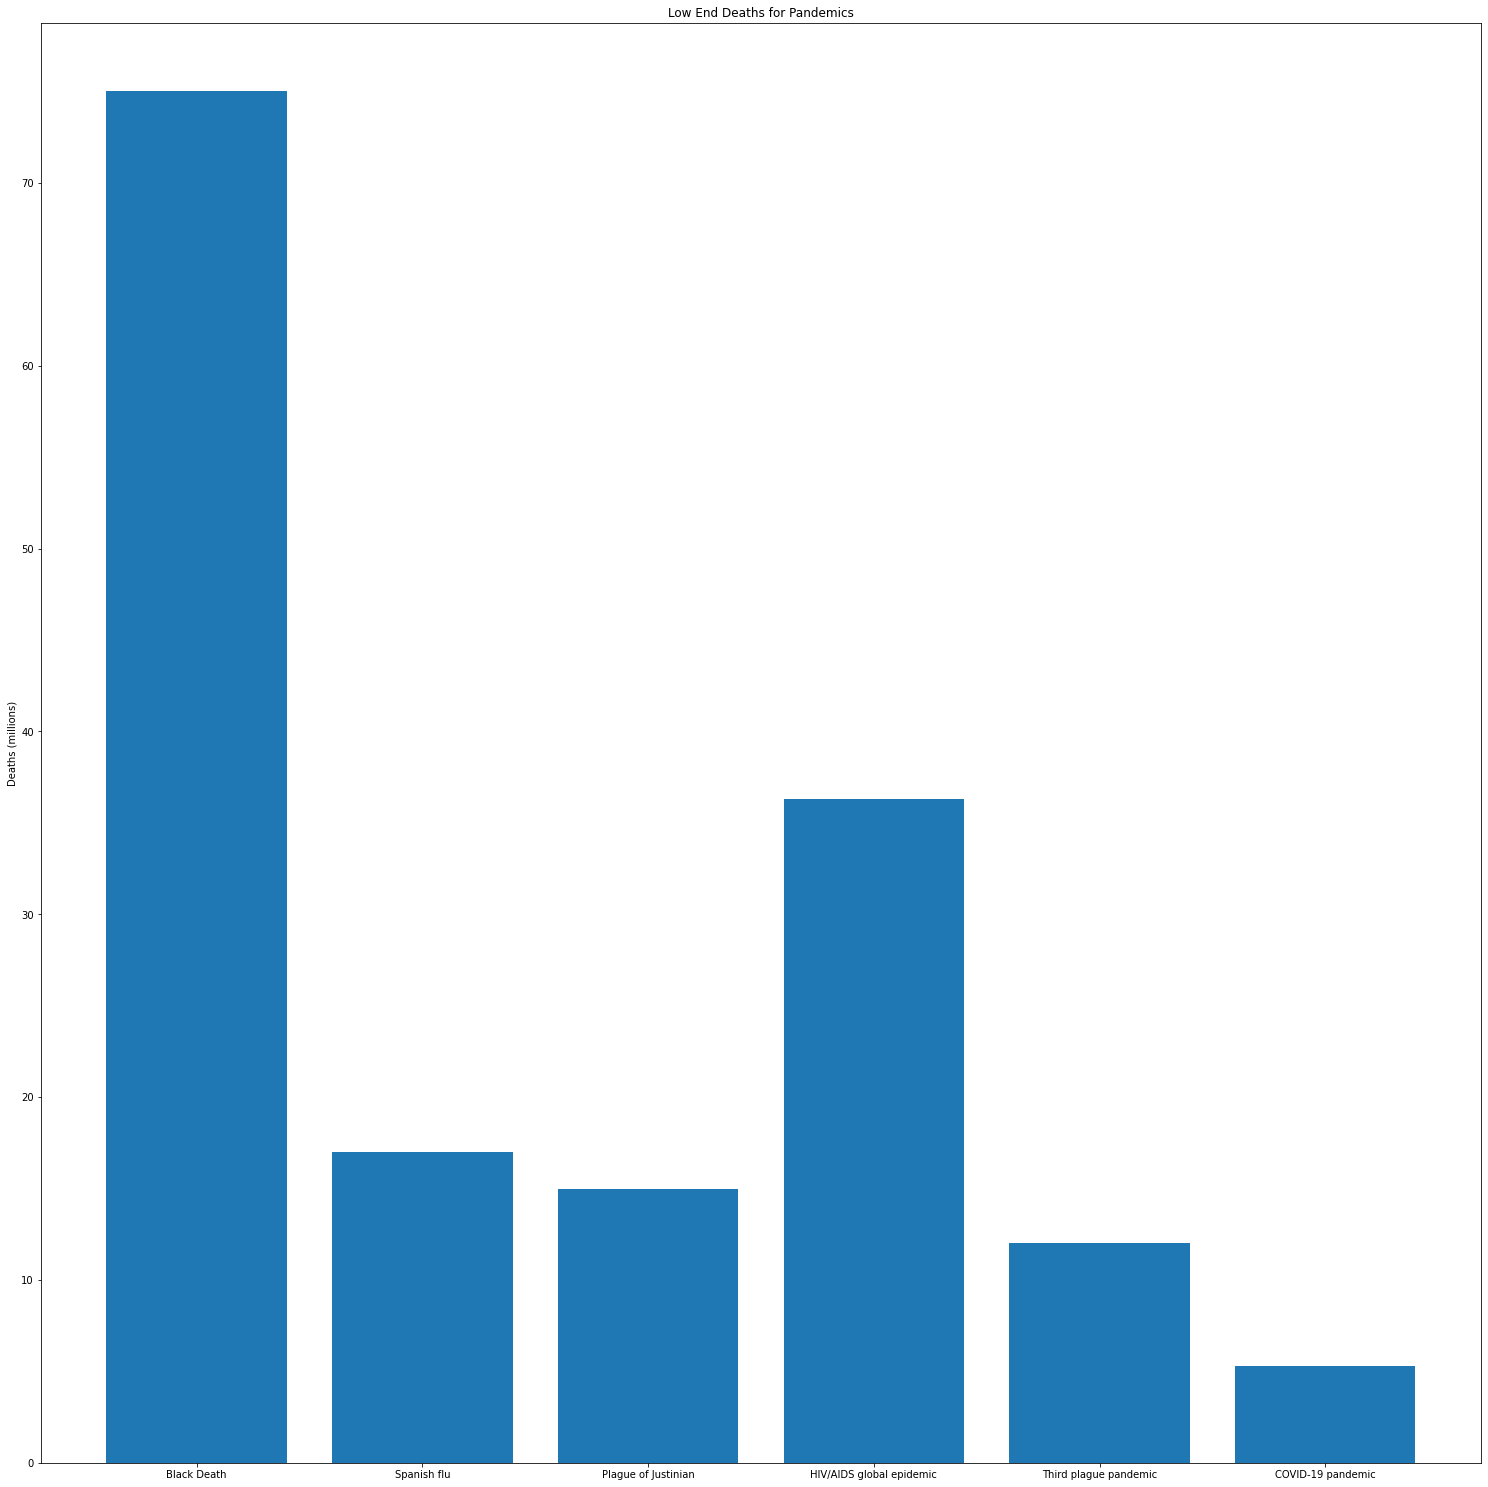

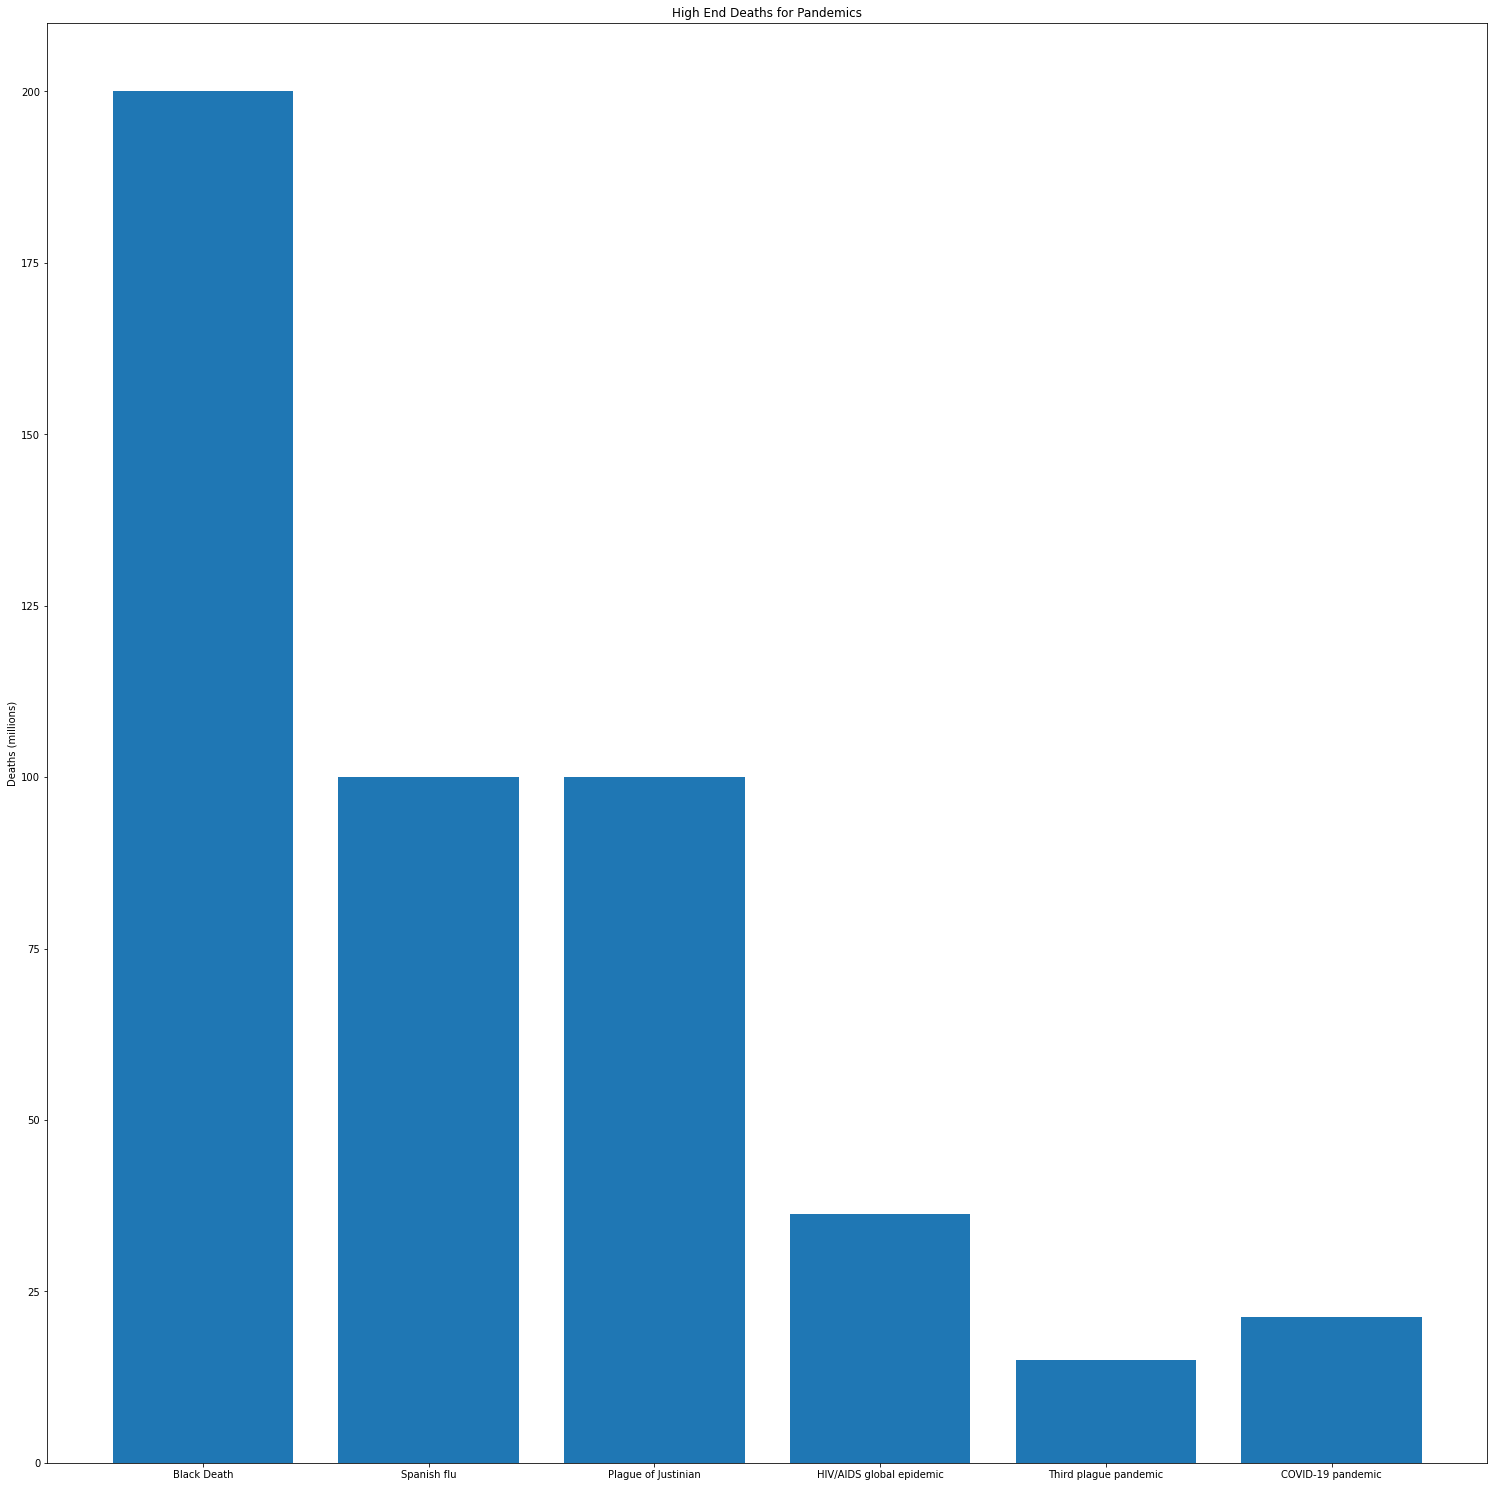

In [25]:
# data 3 graphing

# graph the Low End Death Toll
fig = plt.figure(figsize = (20, 20))
ax = fig.add_axes([0,0,1,1])
plt.ylabel("Deaths (millions)")
plt.title('Low End Deaths for Pandemics')
ax.bar(dataTable3['Name'], dataTable3['Low End Death Toll'])
plt.show()

# graph the High End Death Toll
fig = plt.figure(figsize = (20, 20))
ax = fig.add_axes([0,0,1,1])
plt.ylabel("Deaths (millions)")
plt.title('High End Deaths for Pandemics')
ax.bar(dataTable3['Name'], dataTable3['High End Death Toll'])
plt.show()

Looking at the two graphs, we have a clear visualization of the low and high end death tolls of the top 6 pandemics. In the low end death toll graph, we can see an outlier in the data set. Since HIV/AIDS is an ongoing disease, its low and high end numbers are the same. Although it’s numbers are higher, it is still ranked four because its average death toll is not as high as the top 3 diseases. In the high end graph we can see the same thing with the third plague pandemic. COVID-19 has a higher high end death toll but its still lower rank than the third plague. 

From the high end death toll graph, we can see the distance between COVID-19 and the top 3 diseases. Although there’s still a big distance between them, we shouldn’t get too excited and be carefree.

## Linear Regression

To better compare out data and make prediction, we perform a linear regression, which will give us a straight line that most closely fits the graph of our data. We do this by using a function from one of the libraries we imported to get the slope and y-intercept of our straight line. Then we plot that line with our data. We're not going to include some of the earlier points because they are not going to help us predict the future since they were for when COVID-19 was just starting, so it they wouldn't help represent a decline.

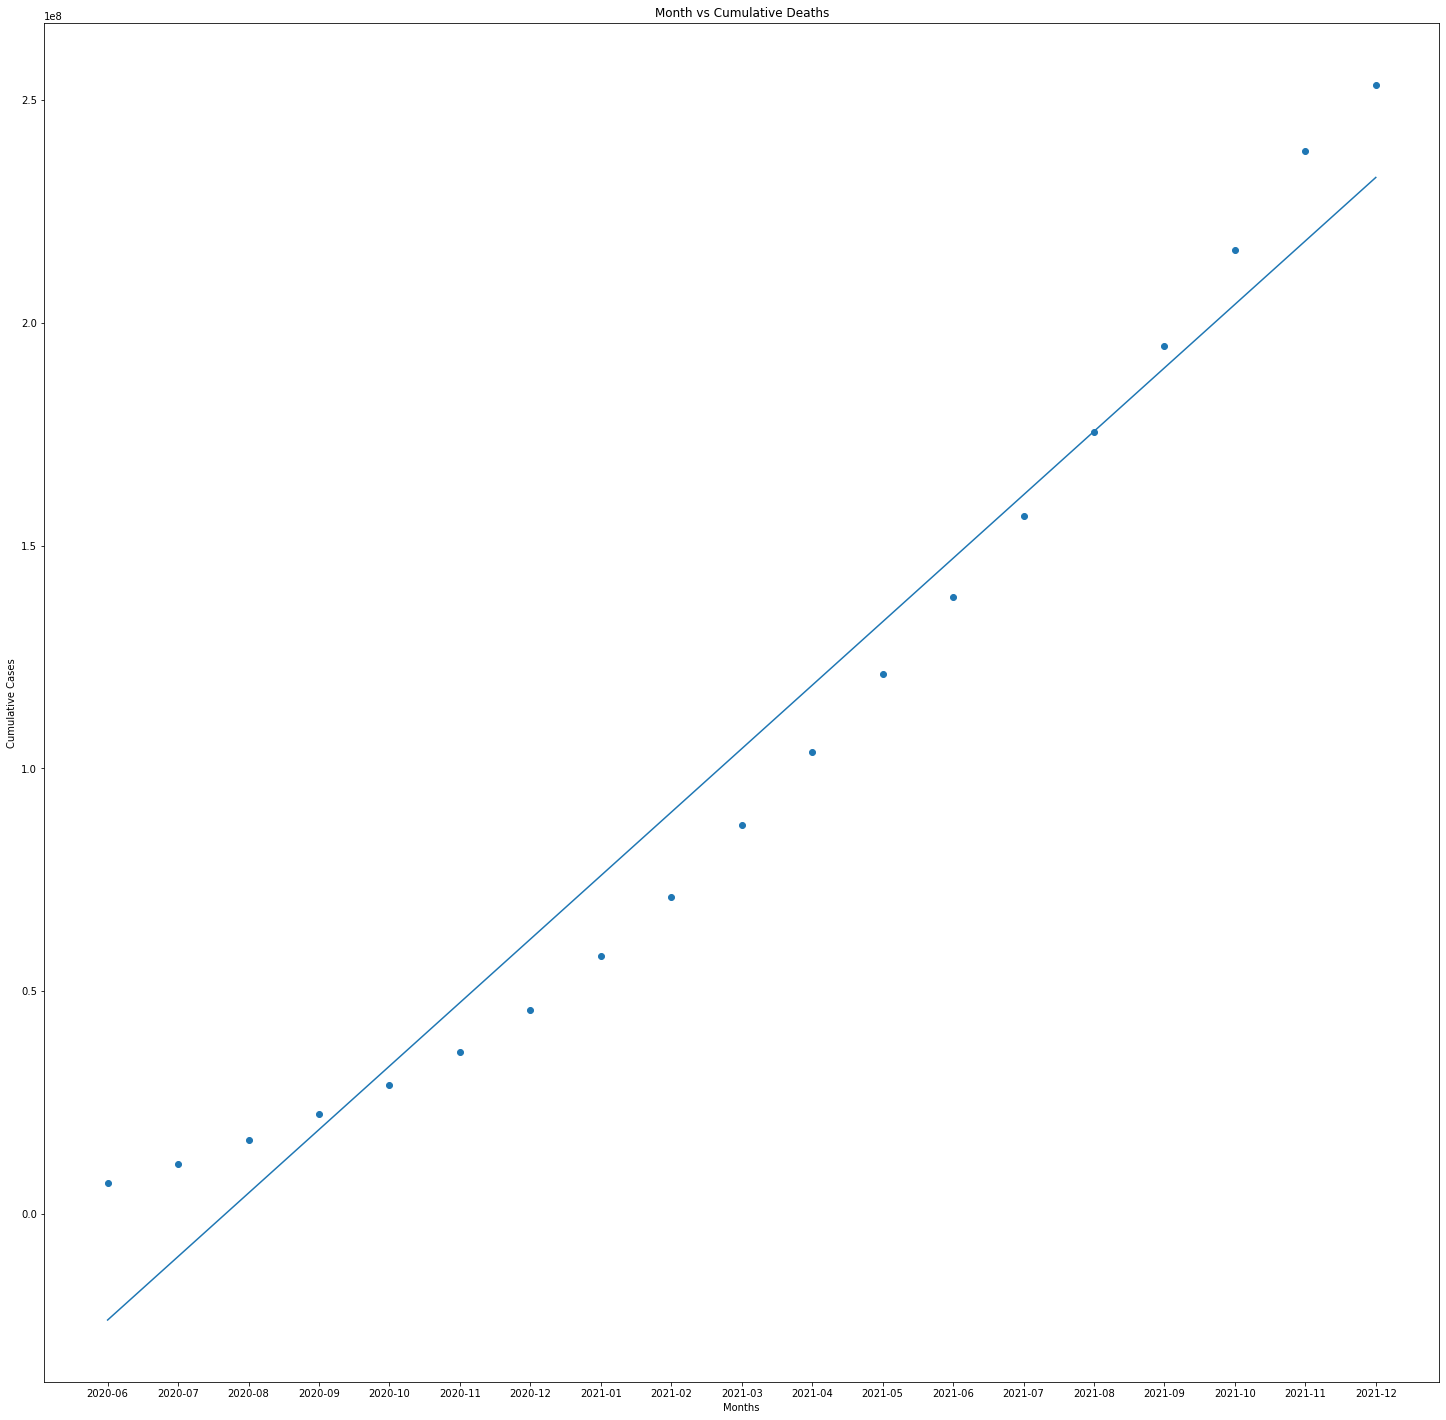

In [26]:
# linear regression of data 2

dataTable2Copy = dataTable2.copy()

# drop the first few data because the numbers are too small
for index, row in dataTable2Copy.iterrows():
    if index != 6:
        dataTable2Copy = dataTable2Copy.drop([index])
    else:
        break

# we drop the first few numbers (1-5) to match the dropped data in dataTable
x1 = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

# using polyfit to get the slope and y-intercept of the line of best fit
m1, b1 = np.polyfit(x1, dataTable2Copy['Cumulative Deaths'].tolist(), 1)

# Set the size of the plots
plt.figure(figsize = (25, 25))

# present the data with a scatter plot
plt.scatter(dataTable2Copy['Year-Month'], dataTable2Copy['Cumulative Deaths'])

# plot the line of best fit
plt.plot(dataTable2Copy['Year-Month'], np.multiply(m1, x1) + b1)

# Label the title, x-axis, and y-axis of the graph
plt.xlabel('Months')
plt.ylabel('Cumulative Cases')
plt.title('Month vs Cumulative Deaths')

plt.show()

Now we have a straight line that most accurately represents the growth of the COVID-19 related cumulative deaths that will help us with our predictions. 

Next, we do the same for the data of the U.S. population growth rate.

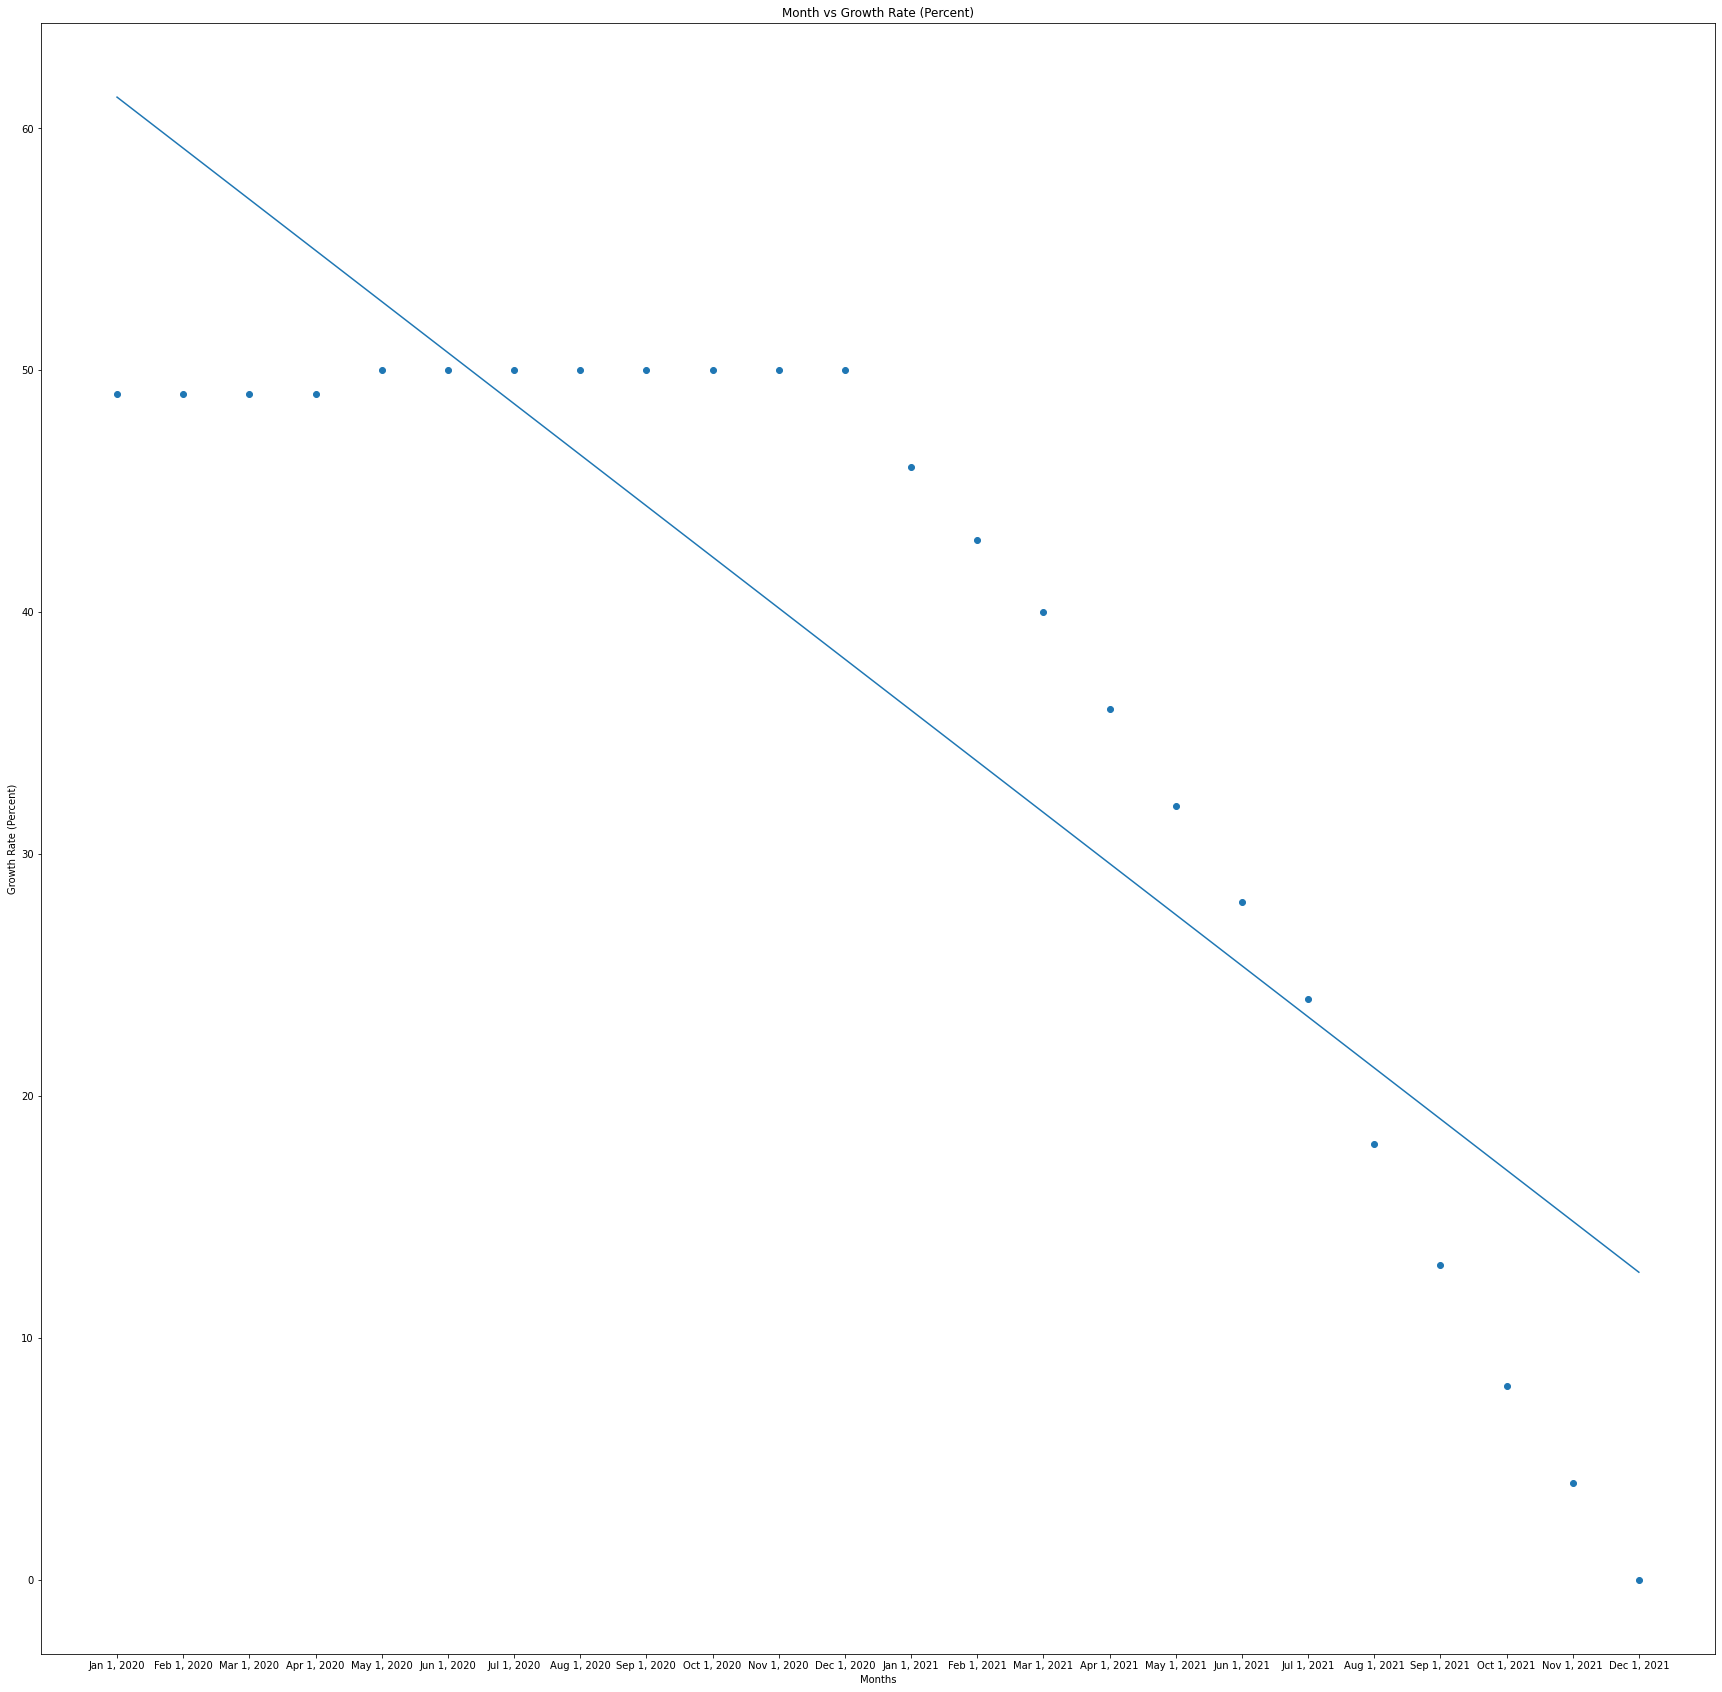

In [27]:
# linear regression of data 1
dataTable1Copy = dataTable1.copy()

# changing the Growth Rate numbers to int so the calculation will be easier
floatToInt = []
for index, row in dataTable1Copy.iterrows():
    floatToInt.append(row['Growth Rate (Percent)'] * 100)

# list of number from 1-24 in respect of months over 2 years
x2 = [1, 2, 3, 4, 5 ,6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]

# using polyfit to get the slope and y-intercept of the line of best fit
m2, b2 = np.polyfit(x2, floatToInt, 1)

# Set the size of the plots
plt.figure(figsize = (30, 30))

# present the data with a scatter plot
plt.scatter(dataTable1Copy['Date'], floatToInt)

# plot the line of best fit
plt.plot(dataTable1Copy['Date'], np.multiply(m2, x2) + b2)

# Label the title, x-axis, and y-axis of the graph
plt.xlabel('Months')
plt.ylabel('Growth Rate (Percent)')
plt.title('Month vs Growth Rate (Percent)')

plt.show()

Now we would like to compare our data, so we're going to plot the two datasets on the same subplot. We have to create the subplots and then label and plot everything separately.

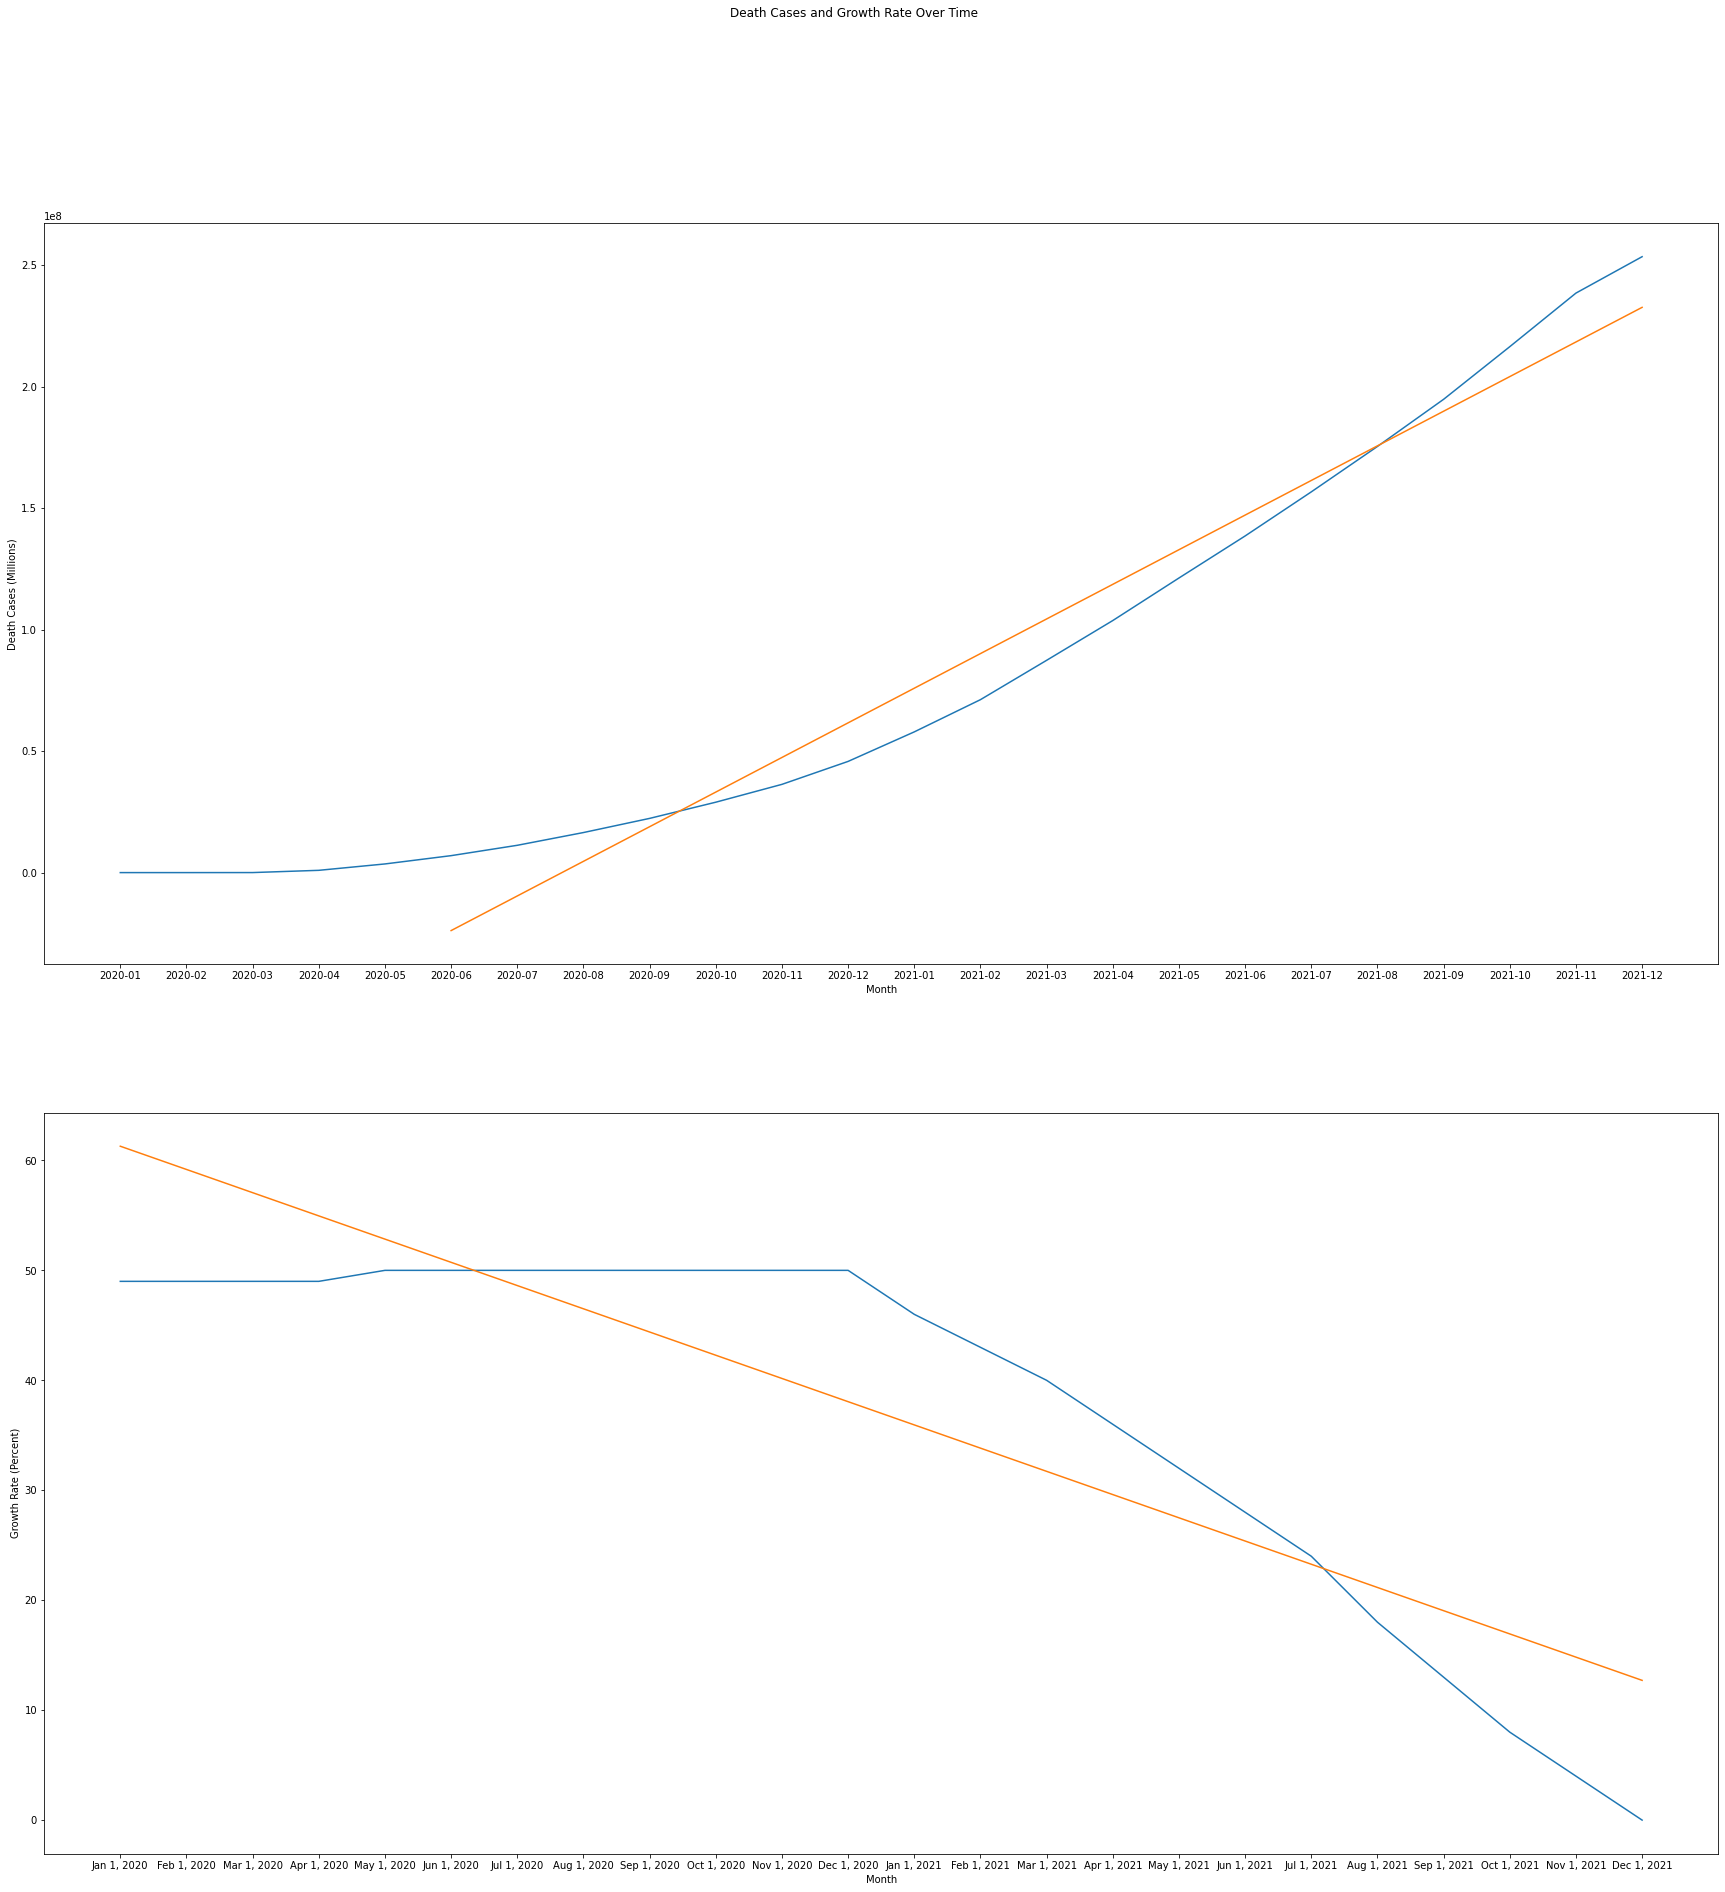

In [28]:
# comparing graphs

# create subplots
fig, axs = plt.subplots(2)
fig.set_figheight(30)
fig.set_figwidth(30)
fig.suptitle('Death Cases and Growth Rate Over Time')

# plotting the Death Cases graph
axs[0].set_xlabel("Month")
axs[0].set_ylabel("Death Cases (Millions)")
axs[0].plot(dataTable2['Year-Month'], dataTable2['Cumulative Deaths'])
axs[0].plot(dataTable2Copy['Year-Month'], np.multiply(m1, x1) + b1)

# plotting the Growth Rate graph
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Growth Rate (Percent)")
axs[1].plot(dataTable1Copy['Date'], floatToInt)
axs[1].plot(dataTable1Copy['Date'], np.multiply(m2, x2) + b2)

We can see that as the number of COVID-19 related deaths increases, the growth rate of the U.S. population decreases. Clearly, COVID-19 has been removing from our population and quarantining has been resulting in a slower growth.

## Making a Prediction

If we examine the slopes that we calculated earlier, we see that the growth rate of the U.S. population is declining while the number of COVID-19 related deaths rises since the slope of the growth rate is negative and the slope of the cumulative deaths is positive.

In [29]:
# Prediction

# slope of the death cases line of best fit
print("slop m1: " + str(m1))

# slope of the growth rate line of best fit
print('slop m2: ' + str(m2))

slop m1: 14249384.229824565
slop m2: -2.1121739130434785


To make a prediction about the U.S. population in the future, we must plot the line of best fit we found above but with  future years for the x-axis. We'll create a new list with new x values to replicate this.

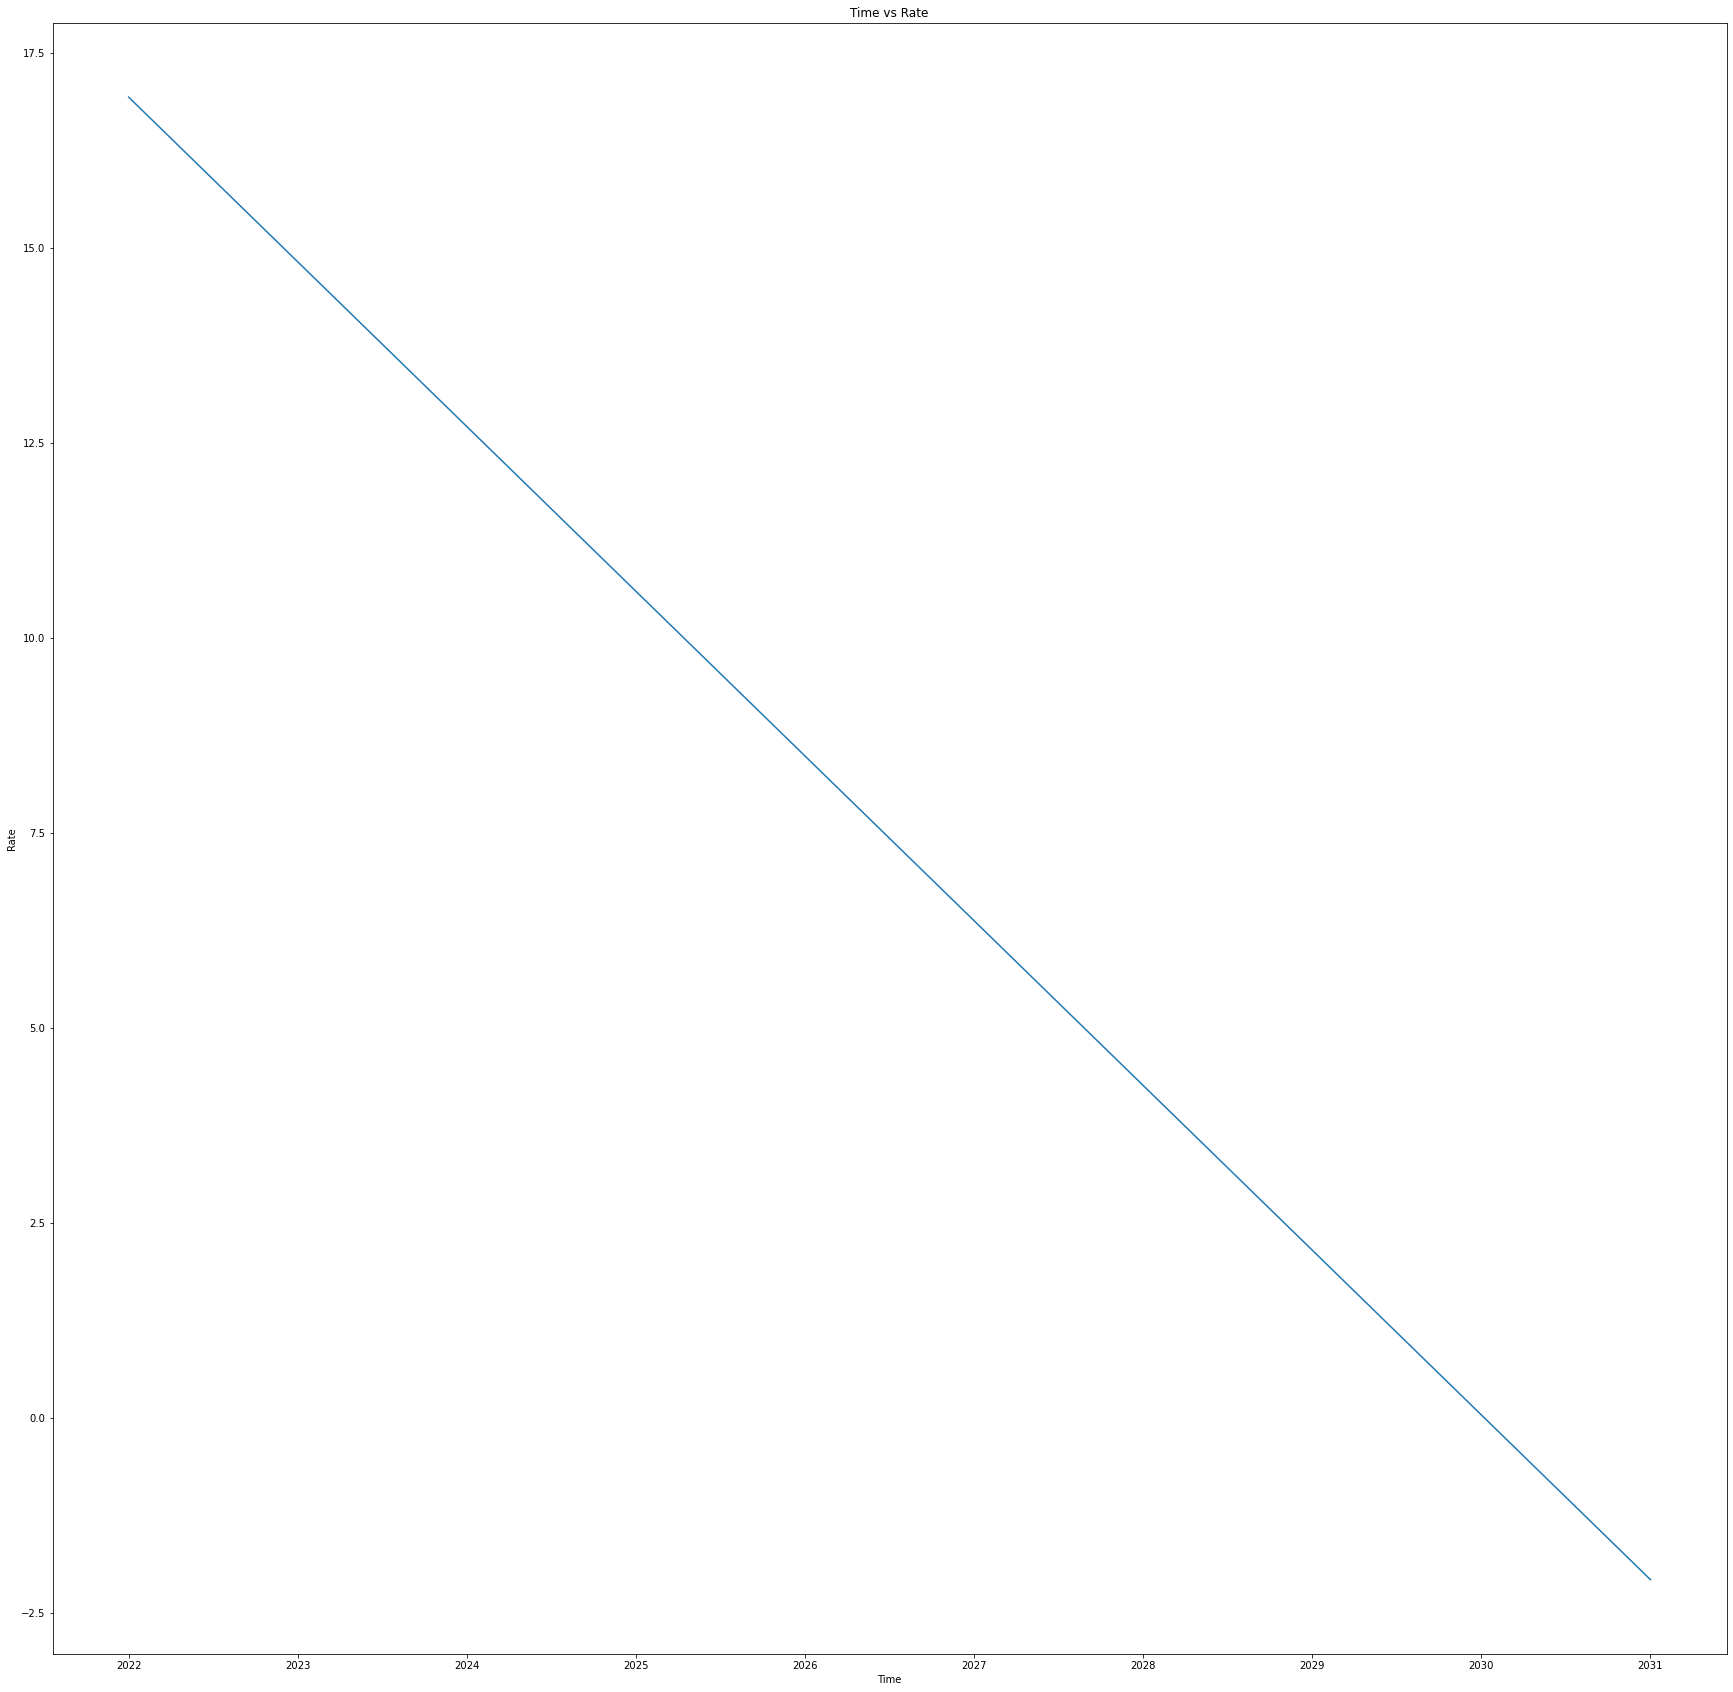

In [30]:
# prediction 

# list for future years
future = [22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
futureString = ["2022","2023","2024","2025","2026","2027","2028","2029","2030","2031"]

# Set the size of the plot
plt.figure(figsize = (30, 30))

# ploting the line of best fit 
plt.plot(futureString, np.multiply(m2, future) + b2)

# Labeling the title, x-axis, and y-axis
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Time vs Rate')

plt.show()

Our plot shows that the U.S. population growth rate will continue to decline, and even become negative in the 2030s. This mean that will the U.S. population in total will begin decreasing.

## Conclusion

Finally, we were able to make a prediction using our data. Our prediction is not accurate however since we used a linear regression on data that isn't linear at all. There are also many different things besides COVID-19 that can affect a population's growth rate. Although we still learned how to scrape data from different websites, organize that data in a way that makes it easier to understand, how to process large data frames as chunks to optimize performance, how to graph that data on meaningful plots, and how to perform a linear regression.

Here are the links to the data we collected: \
stock site: https://www.multpl.com/us-population-growth-rate/table/by-month \
WHO data: https://covid19.who.int/WHO-COVID-19-global-data.csv \
pandemics: https://en.wikipedia.org/wiki/List_of_epidemics

And some more links for further reading on topics we covered: \
processing data frames as chunks: https://pythonspeed.com/articles/chunking-pandas/ \
linear regression: https://realpython.com/linear-regression-in-python/